# Suport Vector Regression- scikit- learn

In [1]:
import pandas as pd
print(pd.__version__)

0.25.1


In [2]:
# Reading the data- data is available at UCG site or KAGGLE site " https://www.kaggle.com/uciml/autompg-dataset"
auto_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\auto-mpg.csv")

In [3]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
auto_data["car name"].nunique()

305

In [6]:
# Dropping "car_name" becasuse it is not required for further anlysis.
auto_data = auto_data.drop("car name",axis=1)

In [7]:
# Checking columns name after droping "car name"
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [8]:
# looking origin column which tell the car orgin ie. 1 = america,2- europe,3 - asia
auto_data["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
auto_data["origin"] = auto_data["origin"].replace({1: "america",2: "europe",3: "asia"})
print("\n")
print(auto_data["origin"].value_counts())



america    249
asia        79
europe      70
Name: origin, dtype: int64


In [10]:
# checking data after replacing meaning full data for origin colum
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [12]:
# Dummification of origin colum
auto_data = pd.get_dummies(auto_data,columns = ["origin"])

In [13]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [14]:
# checking missing value value in dataframe
auto_data.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

It shows there is no missing value availabe in dataset

In [15]:
# impoting numpy library
import numpy as np

In [17]:
# Replacing special character with "nan" value
auto_data = auto_data.replace("?",np.nan)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [18]:
# Droping all the rows which have nan value
auto_data = auto_data.dropna()
auto_data.shape

(392, 10)

# Building Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Spliting data into train and test
X = auto_data.drop("mpg",axis=1)
y = auto_data["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 0)

In [44]:
# Performing SVM regression
from sklearn.svm import SVR

In [22]:
# Initialization of SVR model
svr_reg_model = SVR(kernel="linear",C = 1.0)

In [23]:
# Apply model over train data
svr_reg_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 Over here penlty factor is c = 1.0 and by default "width of the margin 'epsilon = 0.1'"

In [24]:
# Checking coefficient of model
svr_reg_model.coef_

array([[-0.65131731,  0.10313732, -0.16190965, -0.00896875,  0.4332911 ,
         0.85408954, -1.85266565,  0.70061963,  1.15204602]])

In [27]:
# Checking score of the regression model
print("The score of the model is : ",svr_reg_model.score(X_train,y_train))

The score of the model is :  0.6193757170869002


In [30]:
# Visalization
import pandas as pd
import matplotlib.pyplot as plt

predictors = X_train.columns
coef = pd.Series(svr_reg_model.coef_[0],predictors).sort_values()

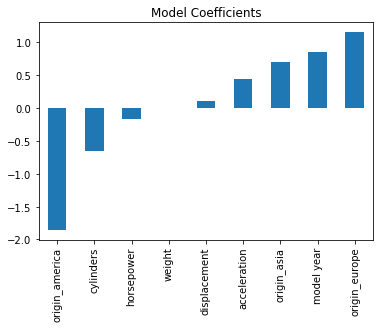

In [31]:
# plotting model coefficient and feature of model
coef.plot(kind = 'bar',title = "Model Coefficients")

In [32]:
# apply model over test data
y_predict = svr_reg_model.predict(X_test)

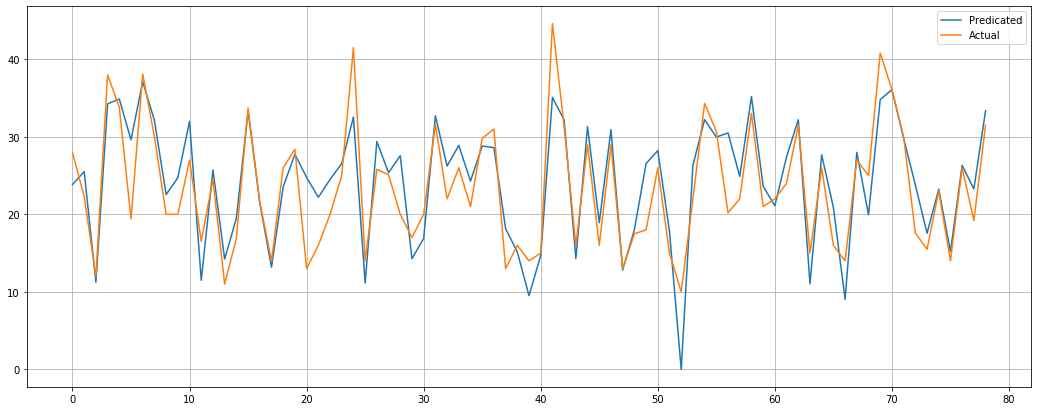

In [34]:
# Plotting predicted value and actual values
plt.figure(figsize=(18,7))
plt.plot(y_predict, label= "Predicated")
plt.plot(y_test.values, label= "Actual")
plt.grid(True)
plt.legend()
plt.show()

In [35]:
# Regression score over test data
svr_reg_model.score(X_test,y_test)

0.7189384368816836

# Model performance matrices

In [36]:
from sklearn.metrics import mean_squared_error

### MSE

In [38]:
print("MSE of test model is :" ,mean_squared_error(y_predict,y_test))

MSE of test model is : 17.469469948804594


### RMSE

In [39]:
import math

In [42]:
print("RMSE of test model is :" ,math.sqrt(mean_squared_error(y_predict,y_test)))

RMSE of test model is : 4.179649500712302


The RMSE indicates that on average the predicted  miles per gallon by our model is about 4 mile off etiher it the
positive or negative direction.